In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

dBhistory_file = 'dBhistory.npy'
srcnn_result   = './result/SRCNN/'  + dBhistory_file
srcnn11_result = './result/SRCNN11/'+ dBhistory_file

load SRCNN Result ./result/SRCNN/dBhistory.npy 19
Loaded data files 1


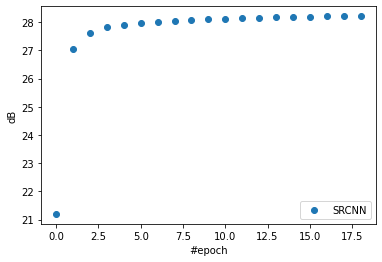

In [2]:
plot_type = 1  # 0:plot 1:scatter

resultdB = {}
if os.path.exists(srcnn_result):
    dB = np.load(srcnn_result)
    resultdB['SRCNN'] = dB
    print('load SRCNN Result',srcnn_result,len(dB))

if os.path.exists(srcnn11_result):
    dB = np.load(srcnn11_result)
    resultdB['SRCNN11'] = dB
    print('load SRCNN11 Result',srcnn11_result,len(dB))

if len(resultdB)==0:
    print('Error : Shown Data not found!')
else:
    print('Loaded data files',len(resultdB))

if plot_type==0:
    # plot
    n_epoch = min([len(resultdB[k]) for k in resultdB])
    for k in resultdB.keys():
        resultdB[k]=resultdB[k][:n_epoch]
    for k in resultdB.keys():
        plt.plot(range(n_epoch), resultdB[k])
else:
    # scatter
    for k in resultdB.keys():
        data = resultdB[k]
        plt.scatter(range(len(data)), data)

plt.legend(resultdB.keys())
plt.xlabel("#epoch")
plt.ylabel("dB")
plt.show()